In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from grouper import group_by_volume, group_by_time
from pyfolio.timeseries import perf_stats
from functools import partial
from utils import chart_price, plot, v_backtester, c_backtester, perf, perf_var, breakout_strategy, bootstrap, m_proc
import sys
sys.path.append('/home/tomek/ib_tools')
from indicators import get_ATR, get_signals
import matplotlib.pyplot as plt
from typing import NamedTuple
from collections import namedtuple
%matplotlib inline

In [2]:
from datastore_pytables import Store

In [3]:
store = Store()
store.keys()

['/cont/min/CL_20191120_NYMEX_USD',
 '/cont/min/ES_20191220_GLOBEX_USD',
 '/cont/min/GC_20191227_NYMEX_USD',
 '/cont/min/GE_20191216_GLOBEX_USD',
 '/cont/min/NKD_20191212_GLOBEX_USD',
 '/cont/min/NQ_20191220_GLOBEX_USD',
 '/cont/min/YM_20191220_ECBOT_USD',
 '/cont/min/ZB_20191219_ECBOT_USD',
 '/cont/min/ZF_20191231_ECBOT_USD',
 '/cont/min/ZN_20191219_ECBOT_USD']

In [4]:
contract = store.read('/cont/min/GC_20191227_NYMEX_USD').sort_index()

In [5]:
b = breakout_strategy(contract, 
                  time_int = 60,
                  periods = [5, 160, 320, 640], #[5, 10, 20, 40,], # 80, 160,],
                  ema_fast = 10,
                  ema_slow = 120,
                  atr_periods = 80,
                  sl_atr = 1,
                  start = '20190101', 
                  end = '20191231', 
                  )

Annual return                 0.0499777
Cumulative returns            0.0348478
Annual volatility             0.0428094
Sharpe ratio                    1.16051
Calmar ratio                    1.90681
Stability                      0.663706
Max drawdown                 -0.0262101
Omega ratio                     1.55859
Sortino ratio                   2.15656
Skew                            2.36614
Kurtosis                        17.7357
Tail ratio                     0.889098
Daily value at risk         -0.00519633
Win percent                       0.525
Average gain                    6.48571
Average loss                   -4.79474
Avg gain/loss ratio             1.35267
Position EV                      1.1275
Positions per day              0.225989
Days per position                 4.425
Actual avg. duration    0 days 08:00:00
Days                                177
Positions                            40
Trades                               80
Monthly EV                      5.35085


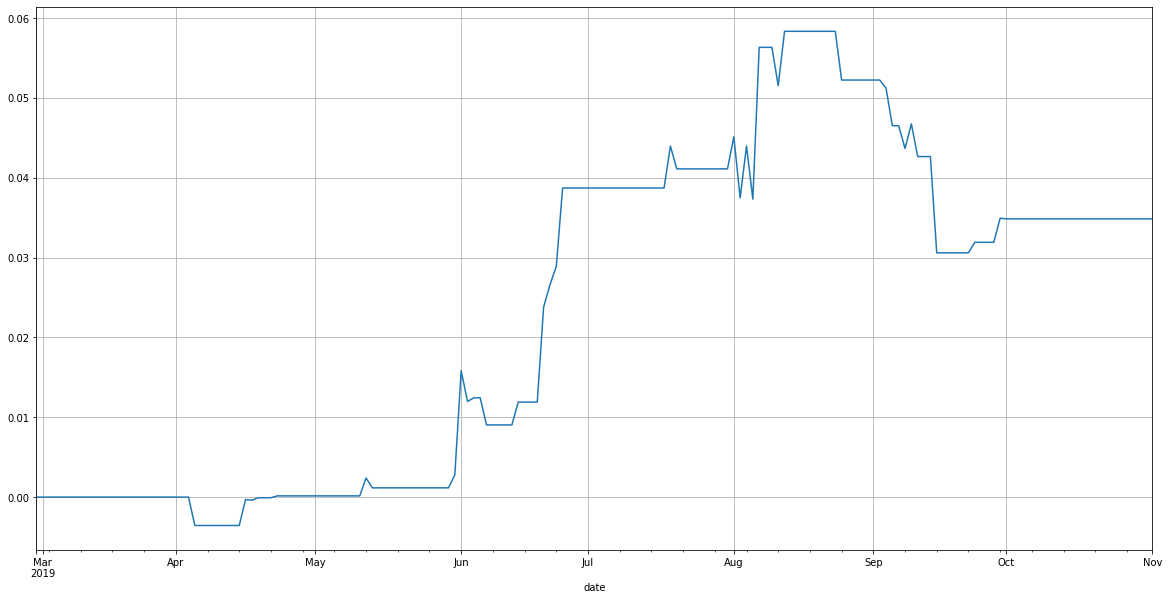

In [6]:
results = perf(b)